# Bitcoin Price Predictor

Tayler Shaw


### Imports

In [115]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import sys
import scipy
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import summary_table # confidence intervall
plt.style.use('ggplot') 
import seaborn as sns  
sns.set() 
from IPython.display import Image

# Background

Bitcoin has been seen as a volatile and risky investment however over the recent years it has made exceptional gains in price. Since 2013 Bitcoin has gone up 53,000% in price, which has shocked the naysayers and thrilled the bagholders. However, these high gains have not been without the inevitable downturns in price, but is there a way to predict a future downturn by other stocks? We decided to look at other comparable high performing stocks and cryptocurrencies to see if there was any correlation between them and if any prediction could be made about Bitcoin in regards to another stock going up. 

### RESEARCH QUESTION: Are the prices of Gold, Ethereum, or Tesla good predictors for the price of Ethereum?

### HYPOTHESIS: Ethereum, gold and tesla can predict the price of Bitcoin.

We chose three points of interest, Gold, Ethereum, and Tesla. We chose gold because Bitcoin is commonly referred to as the ‘electronic gold” due to the ability of common people to mine bitcoin from their computers. The rapid influx in price has been compared to the gold rush of the 1970’s, when the price of gold skyrocketed due to the recession. In addition, during times of uncertainty and worry over the strength of the dollar many times investors will place their money in either gold or bitcoin or both because the asset can be decentralized and can retain the value of your wealth during economic downturns. 

We chose Ethereum because they are comparable cryptocurrencies, and many times one works off of the other. Smart contracts which are done by Ethereum are what are used to trade Bitcoin, therefore it would be assumed that the value of Ethereum and Bitcoin would go up together due to this connection. It is believed that the values are corresponding and the percentages of gains and losses should show common trends. We believe that  if Ethereum goes up or down then subsequently bitcoin would follow suit. 

We chose Tesla as a comparison to another currency or cryptocurrency. Just as how Bitcoin has far surpassed the valuation of price and shocked the marketplace, so too has Tesla exceeded expectations in price time and time again. There must be a commonality that drives these two investments to far overcome walls of valuation.

The datasets that were used were gathered from different sites. The bitcoin and ethereum datasets came from one source, which was a kaggle set which can be found here. https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory

The bitcoin dataset contained 2862 rows × 10 columns. The 10 columns contained the variables of different information on the price of bitcoin, the labels included Sno, Name, Symbol, Date, Low, Open, Close, Volume, and Marketcap. The rows were the samples of price per day. The most relevant labels used in our data for our analysis was ‘date’ variable, which was in time of days, and the ‘close’ label which was the closing price of Bitcoin for that day. 

The Ethereum dataset was in the same format as the Bitcoin dataset. The dataset contained  2031 rows × 10 columns. The 10 columns contained the variables of different information on the price of ethereum, labels included Sno, Name, Symbol, Date, Low, Open, Close, Volume, and Marketcap. The rows were the samples of price per day. The most relevant labels used in our data for our analysis was ‘date’ variable, which was in time of days, and the ‘close’ label which was the closing price of Bitcoin for that day

The Tesla Dataset came from two sources because one was not enough to cover the time span needed for  our 5 year scope on bitcoin. The first set came from the link here, https://www.kaggle.com/timoboz/tesla-stock-data-from-2010-to-2020 and the second set came from the historical data which came from here, https://finance.yahoo.com/quote/TSLA/history/, . The first set contained 7 variables, and 253
 Samples. The second set contained a lot older data start back in 2010 and contained 7 variables and  2416 samples.  Both contained the labels were Date, Open, High, Close, Adjusted Close, and Volume.

The gold data set came from this source here,  https://datahub.io/core/gold-prices. This was a very simple which contained 847 rows × 2 columns, The rows were the samples in months dating from 1950-1 to 2020-7. The 2 variables was the date in months and the price of gold in usd. 





### Read in Datasets

In [116]:
#Bitcoin and Altcoin Data all from the same Data Set
coin_Bitcoin = pd.read_csv('coin_Bitcoin.csv')
coin_Ethereum = pd.read_csv('coin_Ethereum.csv')

#This is Monthly Gold Prices
gold = pd.read_csv('monthly_gold_prices.csv')

# Tesla Stock 
tsla = pd.read_csv("TSLA.csv")
tsla_2020 = pd.read_csv('TSLA-2020.csv')

## Explore the Data

### Bitcoin

In [117]:
# From the big dataset of altcoins and bitcoin prices
print('Samples:  ' + str(2862))
print('Variables:  ' + str(10))
print('Start Date: 2013-04-29')
print('End Date:2021-02-27  ')
print(np.shape(coin_Bitcoin))
coin_Bitcoin.head()

Samples:  2862
Variables:  10
Start Date: 2013-04-29
End Date:2021-02-27  
(2862, 10)


,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [118]:
### Ethereum

In [119]:
print('Samples: 2031 ')
print('Variables: 10')
print('Start Date: 2015-08-08')
print('End Date:2021-02-27 ')
print(np.shape(coin_Ethereum))
coin_Ethereum.head()

Samples: 2031 
Variables: 10
Start Date: 2015-08-08
End Date:2021-02-27 
(2031, 10)


,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,674188.0,4.548689e+07
1,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,532170.0,4.239957e+07
2,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,405283.0,4.281836e+07
3,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1463100.0,6.456929e+07
4,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2150620.0,7.364501e+07


### Gold

In [120]:
print('Samples: 847 ')
print('Variables: 2')
print('Start Date: 1950-01')
print('End Date:2020-07 ')
print(np.shape(gold))
gold.head()

Samples: 847 
Variables: 2
Start Date: 1950-01
End Date:2020-07 
(847, 2)


,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


### Tesla Dataset 1

In [121]:
print('Samples: 2416 ')
print('Variables: 7')
print('Start Date: 	2010-06-29')
print('End Date:2020-02-03 ')
print(np.shape(tsla))
tsla.head()

Samples: 2416 
Variables: 7
Start Date: 	2010-06-29
End Date:2020-02-03 
(2416, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


### Tesla Dataset 2

In [122]:
print('Samples: 253 ')
print('Variables: 7')
print('Start Date:2020-03-12')
print('End Date:2021-03-12 ')
print(np.shape(tsla_2020))
tsla_2020.head()

Samples: 253 
Variables: 7
Start Date:2020-03-12
End Date:2021-03-12 
(253, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-12,116.178001,118.900002,109.250000,112.110001,112.110001,94545500.0
1,2020-03-13,119.000000,121.514000,100.400002,109.323997,109.323997,113201500.0
2,2020-03-16,93.900002,98.973999,88.433998,89.014000,89.014000,102447500.0
3,2020-03-17,88.001999,94.370003,79.199997,86.040001,86.040001,119973000.0
4,2020-03-18,77.800003,80.972000,70.101997,72.244003,72.244003,118931000.0


# METHODS

## METHODS: Data Cleaning
	
    The four datasets came in various variable sizes and sample sizes, therefore in order to create data that would be tailored and organized in such a way to lend itself to analysis we need to create pandas dataframes of all the same length. After dropping the nan values there was an issue with some data which was now missing to mismatch the days in other datasets. In addition due to the limitation of the Date in the gold dataset we decided the best method to simultaneously correct for the mismatch of size and average out the missing values was to condense the dates for all the sets into monthly averages. This way we were looking at 5 years of data condensed down to 60 samples, which was 60 months. We changed the column data for date into a datetime object so we would be able to combine and average the month data. Then made sure all data was sorted by date. Then finally we made sure all data was the same length by slicing the data frames so that all the dates would span over the same time and for the same length. 



### Cleaning Bitcoin Data 

In [123]:
start_index = 831
end_index = 2852

#This creates a new dataframs of just the date and closing price of bitcoin
coin_Bitcoin_Update = coin_Bitcoin[['Date','Close']].copy()
# This matches the start and end dates of the ethereum data set
coin_Bitcoin_Update = coin_Bitcoin_Update[start_index:end_index]

# Here we are updatting the "Date" column data to be datetime
coin_Bitcoin_Update.set_index('Date', inplace=True)

# Then set the index to the data
coin_Bitcoin_Update.index = pd.to_datetime(coin_Bitcoin_Update.index)

# Make sure its sorted
coin_Bitcoin_Update.sort_index()

# This will take the mean of the data within one month and set it
coin_Bitcoin_Update = coin_Bitcoin_Update.resample('1M').mean()
coin_Bitcoin_Update

# Indexing Bitcoin dataset
    # matbe move this one up to where the dataset for bitcoin is
coin_Bitcoin_Update= coin_Bitcoin_Update[:60]

# Resetting the index
coin_Bitcoin_Update.reset_index(inplace= True)
coin_Bitcoin_Update.shape
print("The shape of the dataset is now " + str(np.shape(coin_Bitcoin_Update)))
coin_Bitcoin_Update.head()


The shape of the dataset is now (60, 2)


,Date,Close
0,2015-08-31,241.751832
1,2015-09-30,233.595533
2,2015-10-31,264.855356
3,2015-11-30,348.883332
4,2015-12-31,424.464547


### Cleaning Ethereum Data

In [124]:
## Reorganizing the datatset
coin_Ethereum_Update = coin_Ethereum[['Date','Close']].copy()

# Here we are updatting the "Date" column data to be datetime
coin_Ethereum_Update.set_index('Date', inplace=True)

# Then set the index to the dat
coin_Ethereum_Update.index = pd.to_datetime(coin_Ethereum_Update.index)

# Make sure its sorted
coin_Ethereum_Update.sort_index()

# This will take the mean of the data within one month and set it
coin_Ethereum_Update = coin_Ethereum_Update.resample('1M').mean()
coin_Ethereum_Update.reset_index(inplace= True)

#Indexing the data set
coin_Ethereum_Update= coin_Ethereum_Update[:60]
print("The shape of the dataset is now " + str(np.shape(coin_Ethereum_Update)))
coin_Ethereum_Update.head()

The shape of the dataset is now (60, 2)


,Date,Close
0,2015-08-31,1.259649
1,2015-09-30,0.988966
2,2015-10-31,0.661104
3,2015-11-30,0.931352
4,2015-12-31,0.886259


### Cleaning Gold Data

In [125]:
## Reorganizing the dataset
gold_update = gold[['Date','Price']].copy()

# Here we are updatting the "Date" column data to be datetime
gold_update.set_index('Date', inplace=True)

# Then set the index to the dat
gold_update.index = pd.to_datetime(gold_update.index)

# Make sure its sorted
gold_update.sort_index()

# This will take the mean of the data within one month and set it
gold_update = gold_update.resample('1M').mean()

# Indexing the dataset
gold_update= gold_update[787:847]

# Resetting the index
gold_update.reset_index(inplace= True)
print("The shape of the dataset is now " + str(np.shape(gold_update)))
gold_update.head()

The shape of the dataset is now (60, 2)


,Date,Price
0,2015-08-31,1117.525
1,2015-09-30,1124.905
2,2015-10-31,1157.123
3,2015-11-30,1088.388
4,2015-12-31,1068.317


### Cleaning Tesla Dataset 1

In [126]:
# Here we are updatting the "Date" column data to be datetime
tsla.set_index('Date', inplace=True)

# Then set the index to the data
tsla.index = pd.to_datetime(tsla.index)

# Make sure its sorted
tsla = tsla.sort_index()

# This will take the mean of the data within one month and set it
tsla = tsla.resample('1M').mean()

# Indexing TSLA dataset
tsla = tsla[62:122]

# Resetting the index
tsla.reset_index(inplace=True)

### Cleaning Tesla Dataset 1

In [127]:
# Creating data set of second TSLA set
# Here we are updatting the "Date" column data to be datetime
tsla_2020.set_index('Date', inplace=True)

# Then set the index to the data
tsla_2020.index = pd.to_datetime(tsla_2020.index)

# Make sure it's sorted
tsla_2020 = tsla_2020.sort_index()

# This will take the mean of the data within one month and set it
tsla_2020 = tsla_2020.resample('1M').mean()

# Indexing TSLA dataset
tsla_2020 = tsla_2020[:5]

# Resetting the index
tsla_2020.reset_index(inplace=True)


TSLA currently only contains observation from Aug. 2015 - Feb. 2020. We need to add in observations up to July 2020 to match with the rest of the datasets.

In [128]:
# Combining the two datsets together
tsla = pd.concat([tsla, tsla_2020], ignore_index = True) 
print("The shape of the dataset is now " + str(np.shape(gold_update)))
tsla.head()

The shape of the dataset is now (60, 2)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-31,243.783332,249.409999,238.736189,244.550475,244.550475,5.488767e+06
1,2015-09-30,253.346667,256.621430,248.981904,252.906191,252.906191,3.823243e+06
2,2015-10-31,223.111363,226.273182,217.824090,221.982728,221.982728,4.582364e+06
3,2015-11-30,220.641000,224.008501,217.090501,220.882001,220.882001,3.924420e+06
4,2015-12-31,230.100456,233.620910,226.829090,230.171819,230.171819,2.720250e+06


## METHODS: Linear Regression Methods for Model 1 - 3

We performed a linear regression analysis. In order to check which of the 3 subjects of interest may be the best predictor of bitcoin price. In order to do this we first created a simple standard model for each of the 3 subjects, Ethereum, Gold, and Tesla.
    
    MODEL 1: GOLD and BITCOIN (BTC = m*GOLD + b)
    MODEL 2: ETHEREUM AND BITCOIN (BTC = m*ETH + b)
    MODEL 3: TSLA and BITCOIN (BTC = m*TSLA + b)

In the first three models we used sklearn tools to first split the data, then used numpy ployfit to obtain the weights of the models train and test set. Then using matplot we compared the graphs of the linear regression analysis for both the training and test set. Then using sklearn mean squared error tool we calculated the RMSE using the the predicted and actual values of both the training and test sets. Then finally compared the mean of the original data and the training for both Bitcoin and the respective subjects to the model, either gold,ethereum or tesla. 


### MODEL 1: GOLD and BITCOIN (BTC = m*GOLD + b)

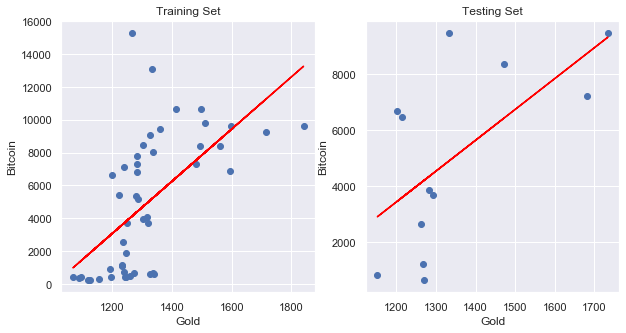

In [129]:
#Split the data
gold_train, gold_test, coin_Bitcoin_Update_train, coin_Bitcoin_Update_test = train_test_split(gold_update['Price'],
                                                                                             coin_Bitcoin_Update['Close'],
                                                                                             test_size= 0.20, random_state= 15)
# Plot the data
fig, (ax1, ax2)= plt.subplots(1, 2, figsize= (10, 5))
# Plot the data
ax1.plot(gold_train, coin_Bitcoin_Update_train, 'o')
ax2.plot(gold_test, coin_Bitcoin_Update_test, 'o')
# Plot the regression line
m, b= np.polyfit(gold_train, coin_Bitcoin_Update_train, 1)
m2, b2= np.polyfit(gold_test, coin_Bitcoin_Update_test, 1)
ax1.plot(gold_train, m*(gold_train) + b, color= 'red')
ax2.plot(gold_test, m2*(gold_test) + b2, color= 'red')
#Calculate RMSEs.
M1_rmse_train = np.sqrt(mean_squared_error(coin_Bitcoin_Update_train, m*(gold_train) + b))
M1_rmse_test = np.sqrt(mean_squared_error(coin_Bitcoin_Update_test, m2*(gold_test) + b2))
# Labeling the graph
ax1.set_xlabel('Gold')
ax1.set_ylabel('Bitcoin')
ax1.set_title('Training Set')
ax2.set_xlabel('Gold')
ax2.set_ylabel('Bitcoin')
ax2.set_title('Testing Set')
plt.show() # This lets you plot multiple inputs on the same graph

#### Comparing Original and Training Set

In [130]:
# Comparision, Training Set Matches
mean_gold_data = gold_update['Price'].mean()
mean_gold_train = gold_train.mean()
mean_Bitcoin_data = coin_Bitcoin_Update['Close'].mean()
mean_Bitcoin_train = coin_Bitcoin_Update_train.mean()

print('Mean of Original Gold Data: ' + str(mean_gold_data))
print('Mean of Gold Train Data: ' + str(mean_gold_train))
print('Mean of Original Bitcoin Data: ' + str(mean_Bitcoin_data))
print('Mean of Bitcoin Train Data: ' + str(mean_Bitcoin_train))

Mean of Original Gold Data: 1321.6909833333334
Mean of Gold Train Data: 1315.4634374999996
Mean of Original Bitcoin Data: 4933.246067739443
Mean of Bitcoin Train Data: 4903.192408915919


### MODEL 2: ETHEREUM AND BITCOIN (BTC = m*ETH + b)

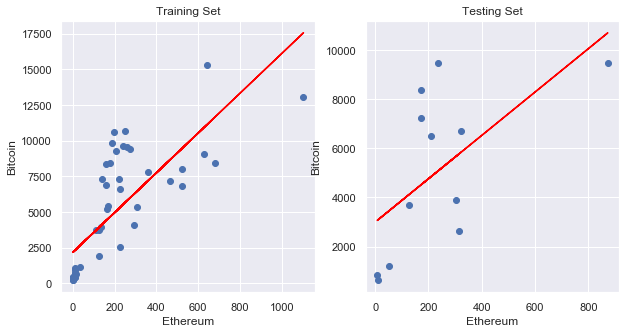

In [131]:
#split the data
ethereum_train, ethereum_test, coin_Bitcoin_Update_train, coin_Bitcoin_Update_test = train_test_split(coin_Ethereum_Update['Close'],
                                                                                             coin_Bitcoin_Update['Close'],
                                                                                           test_size= 0.20, random_state=15)
# Plot the data
fig, (ax3, ax4)= plt.subplots(1, 2, figsize= (10, 5))
# Plot the data
ax3.plot(ethereum_train, coin_Bitcoin_Update_train, 'o')
ax4.plot(ethereum_test, coin_Bitcoin_Update_test, 'o')
# Plot the regression line
m3, b3= np.polyfit(ethereum_train, coin_Bitcoin_Update_train, 1)
m4, b4= np.polyfit(ethereum_test, coin_Bitcoin_Update_test, 1)
#Calculate RMSEs.
M2_rmse_train = np.sqrt(mean_squared_error(coin_Bitcoin_Update_train, m3*(ethereum_train) + b3))
M2_rmse_test = np.sqrt(mean_squared_error(coin_Bitcoin_Update_test, m4*(ethereum_test) + b4))
# Plot the regression line
ax3.plot(ethereum_train, m3*(ethereum_train) + b3, color= 'red')
ax4.plot(ethereum_test, m4*(ethereum_test) + b4, color= 'red')
# Labeling the graph
ax3.set_xlabel('Ethereum')
ax3.set_ylabel('Bitcoin')
ax3.set_title('Training Set')
ax4.set_xlabel('Ethereum')
ax4.set_ylabel('Bitcoin')
ax4.set_title('Testing Set')
plt.show() # This lets you plot multiple inputs on the same graph

#### Comparing Original and Training Set

In [132]:
# Comparision, Training Set Matches
mean_ethereum_data = coin_Ethereum_Update['Close'].mean()
mean_ethereum_train = ethereum_train.mean()

mean_Bitcoin_data = coin_Bitcoin_Update['Close'].mean()
mean_Bitcoin_train = coin_Bitcoin_Update_train.mean()

print('Mean of Original Ethereum Data: ' + str(mean_ethereum_data))
print('Mean of Ethereum Train Data: ' + str(mean_ethereum_train))
print('Mean of Original Bitcoin Data: ' + str(mean_Bitcoin_data))
print('Mean of Bitcoin Train Data: ' + str(mean_Bitcoin_train))

Mean of Original Ethereum Data: 203.7693348235417
Mean of Ethereum Train Data: 196.36458018405213
Mean of Original Bitcoin Data: 4933.246067739443
Mean of Bitcoin Train Data: 4903.192408915919


### MODEL 3: TSLA and BITCOIN (BTC = m*TSLA + b)

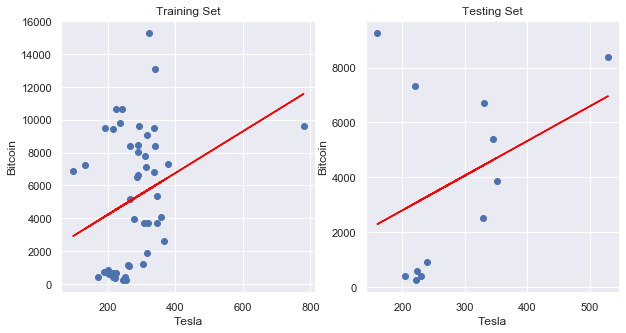

In [159]:
#split the data
tsla_train, tsla_test, coin_Bitcoin_Update_train, coin_Bitcoin_Update_test = train_test_split(tsla['Close'],
                                                                                             coin_Bitcoin_Update['Close'],
                                                                                             test_size= 0.20, random_state= 20)

# Plot the data
fig, (ax5, ax6)= plt.subplots(1, 2, figsize= (10, 5))
# Plot the data
ax5.plot(tsla_train, coin_Bitcoin_Update_train, 'o')
ax6.plot(tsla_test, coin_Bitcoin_Update_test, 'o')
# Plot the regression line
m5, b5= np.polyfit(tsla_train, coin_Bitcoin_Update_train, 1)
m6, b6= np.polyfit(tsla_test, coin_Bitcoin_Update_test, 1)
# Plot the regression line
ax5.plot(tsla_train, m5*(tsla_train) + b5, color= 'red')
ax6.plot(tsla_test, m6*(tsla_test) + b6, color= 'red')
#Calculate RMSEs.
M3_rmse_train = np.sqrt(mean_squared_error(coin_Bitcoin_Update_train, m5*(tsla_train) + b5))
M3_rmse_test = np.sqrt(mean_squared_error(coin_Bitcoin_Update_test,  m6*(tsla_test) + b6))
# Labeling the graph
ax5.set_xlabel('Tesla')
ax5.set_ylabel('Bitcoin')
ax5.set_title('Training Set')
ax6.set_xlabel('Tesla')
ax6.set_ylabel('Bitcoin')
ax6.set_title('Testing Set')
plt.show() # This lets you plot multiple inputs on the same graph

#### Comparing Original and Training Set

In [134]:
# Comparision, Training Set Matches
mean_tsla_data = tsla['Close'].mean()
mean_tsla_train = tsla_train.mean()

mean_Bitcoin_data = coin_Bitcoin_Update['Close'].mean()
mean_Bitcoin_train = coin_Bitcoin_Update_train.mean()

print('Mean of Original TSLA Data: ' + str(mean_tsla_data))
print('Mean of TSLA Train Data: ' + str(mean_tsla_train))
print('Mean of Original Bitcoin Data: ' + str(mean_Bitcoin_data))
print('Mean of Bitcoin Train Data: ' + str(mean_Bitcoin_train))

Mean of Original TSLA Data: 278.8939266149611
Mean of TSLA Train Data: 278.12947268636975
Mean of Original Bitcoin Data: 4933.246067739443
Mean of Bitcoin Train Data: 5206.9415276486325


## METHODS: Linear Regression Methods for Models 4-6

For the last three models we used the more general approach as taught in our COGS 109 class, but added extra terms in order to create a better fit to the data. We tested multivariate variable models using these models.

    MODEL 4: BTC = w0 + w1 * GOLD + w2 * TSLA
    MODEL 5: ETH + TSLA and BTC (BTC = w0 + w1 * ETH + w2 * TSLA)
    MODEL 6: GOLD + ETH and BTC (BTC = w0 + w1 * GOLD + w2 * ETH)

 Here we put the data into an array matrix form, y = Aw. Then solved for the weight vector using the numpy tool np.linalg.lstsq(A,y)[0]. Using those weights we calculated the test and train sets, then visualized the model using those predicted values and plotting them using matplotlib. We then calculated the SSE values and and RMSE values using numpy tools to do the calculations.


### MODEL 4: GOLD + TESLA and BITCOIN (BTC = w0 + w1 * GOLD + w2 * TSLA
Starting from M4, we are testing multivariate variable models

In [135]:
#split the data
gold_train, gold_test, tsla_train, tsla_test, coin_Bitcoin_Update_train, coin_Bitcoin_Update_test = train_test_split(gold_update['Price'],
                                                                                            tsla['Close'],
                                                                                            coin_Bitcoin_Update['Close'], 
                                                                                            test_size= 0.20, random_state=20) 
## Create A, the augmented data array
X1 = np.array(gold_train).reshape(-1, 1)
X2 = np.array(tsla_train).reshape(-1, 1)
Y = np.array(coin_Bitcoin_Update_train).reshape(-1, 1)    
w0_coeff = [1]*48

A4 = np.hstack((np.reshape(w0_coeff, (48,1)), X1, X2))

## Solve for w, the weighted vector
w4 = np.linalg.lstsq(A4, Y, rcond = None)[0]

## We get M4 = -1.668 + 1.419*GOLD + 1.072*TSLA
M4_predicted_Y_train = -1.668 + 1.419*gold_train + 1.072*tsla_train
M4_predicted_Y_test = -1.668 + 1.419*gold_test + 1.072*tsla_test

#Calculate RMSEs.
M4_rmse_train = np.sqrt(mean_squared_error(coin_Bitcoin_Update_train, M4_predicted_Y_train))
M4_rmse_test = np.sqrt(mean_squared_error(coin_Bitcoin_Update_test, M4_predicted_Y_test))


#### Comparing Original and Training Set

In [152]:
# Comparision, Training Set Matches
mean_gold_data = gold_update['Price'].mean()
mean_gold_train = gold_train.mean()

mean_tsla_data = tsla['Close'].mean()
mean_tsla_train = tsla_train.mean()

mean_Bitcoin_data = coin_Bitcoin_Update['Close'].mean()
mean_Bitcoin_train = coin_Bitcoin_Update_train.mean()

print('Mean of Original Gold Data: ' + str(mean_gold_data))
print('Mean of Gold Train Data: ' + str(mean_gold_train))
print('Mean of Original TSLA Data: ' + str(mean_tsla_data))
print('Mean of TSLA Train Data: ' + str(mean_tsla_train))
print('Mean of Original Bitcoin Data: ' + str(mean_Bitcoin_data))
print('Mean of Bitcoin Train Data: ' + str(mean_Bitcoin_train))


Mean of Original Gold Data: 1321.6909833333334
Mean of Gold Train Data: 1318.6616666666666
Mean of Original TSLA Data: 278.8939266149611
Mean of TSLA Train Data: 283.62285860286823
Mean of Original Bitcoin Data: 4933.246067739443
Mean of Bitcoin Train Data: 4878.241012514055


### MODEL 5: ETH + TSLA and BTC (BTC = w0 + w1 * ETH  + w2 * TSLA)

In [153]:
#split the data
eth_train, eth_test, tsla_train, tsla_test, coin_Bitcoin_Update_train, coin_Bitcoin_Update_test = train_test_split(coin_Ethereum_Update['Close'],
                                                                                            tsla['Close'],
                                                                                            coin_Bitcoin_Update['Close'], 
                                                                                            test_size= 0.20, random_state=19) 
## Create A, the augmented data array
X1 = np.array(eth_train).reshape(-1, 1)
X2 = np.array(tsla_train).reshape(-1, 1)
Y = np.array(coin_Bitcoin_Update_train).reshape(-1, 1)    
w0_coeff = [1]*48

A5 = np.hstack((np.reshape(w0_coeff, (48,1)), X1, X2))

## Solve for w, the weighted vector
w5 = np.linalg.lstsq(A5, Y, rcond = None)[0]

## We get M5 = 1728.082 + 12.035*ETH + 2.953*TSLA
M5_predicted_Y_train = 1728.082 + 12.035*eth_train + 2.953*tsla_train
M5_predicted_Y_test = 1728.082 + 12.035*eth_test + 2.953*tsla_test

#Calculate RMSEs.
M5_rmse_train = np.sqrt(mean_squared_error(coin_Bitcoin_Update_train, M5_predicted_Y_train))
M5_rmse_test = np.sqrt(mean_squared_error(coin_Bitcoin_Update_test, M5_predicted_Y_test))

#### Comparing Original and Training Set

In [155]:
# Comparision, Training Set Matches
mean_eth_data = coin_Ethereum_Update['Close'].mean()
mean_eth_train = eth_train.mean()

mean_tsla_data = tsla['Close'].mean()
mean_tsla_train = tsla_train.mean()

mean_Bitcoin_data = coin_Bitcoin_Update['Close'].mean()
mean_Bitcoin_train = coin_Bitcoin_Update_train.mean()

print('Mean of Original ETH Data: ' + str(mean_eth_data))
print('Mean of ETH Train Data: ' + str(mean_eth_train))
print('Mean of Original TSLA Data: ' + str(mean_tsla_data))
print('Mean of TSLA Train Data: ' + str(mean_tsla_train))
print('Mean of Original Bitcoin Data: ' + str(mean_Bitcoin_data))
print('Mean of Bitcoin Train Data: ' + str(mean_Bitcoin_train))


Mean of Original ETH Data: 203.7693348235417
Mean of ETH Train Data: 200.24840632376268
Mean of Original TSLA Data: 278.8939266149611
Mean of TSLA Train Data: 283.62285860286823
Mean of Original Bitcoin Data: 4933.246067739443
Mean of Bitcoin Train Data: 4878.241012514055


### MODEL 6: GOLD + ETH and BTC (BTC = w0 + w1 * GOLD  + w2 * ETH)

In [156]:
#split the data
gold_train, gold_test, eth_train, eth_test, coin_Bitcoin_Update_train, coin_Bitcoin_Update_test = train_test_split(gold_update['Price'],
                                                                                            coin_Ethereum_Update['Close'],
                                                                                            coin_Bitcoin_Update['Close'], 
                                                                                            test_size= 0.20, random_state=19) 
## Create A, the augmented data array
X1 = np.array(gold_train).reshape(-1, 1)
X2 = np.array(eth_train).reshape(-1, 1)
Y = np.array(coin_Bitcoin_Update_train).reshape(-1, 1)    
w0_coeff = [1]*48

A6 = np.hstack((np.reshape(w0_coeff, (48,1)), X1, X2))

## Solve for w, the weighted vector
w6 = np.linalg.lstsq(A6, Y, rcond = None)[0]
w6

## We get M6 = -1.493 + 1.334*GOLD + 1.104*ETH
M6_predicted_Y_train = -1.493 + 1.334*gold_train + 1.104*eth_train
M6_predicted_Y_test =  -1.493 + 1.334*gold_test + 1.104*eth_test

#Calculate RMSEs.
M6_rmse_train = np.sqrt(mean_squared_error(coin_Bitcoin_Update_train, M6_predicted_Y_train))
M6_rmse_test = np.sqrt(mean_squared_error(coin_Bitcoin_Update_test, M6_predicted_Y_test))

#### Comparing Original and Training Set

In [157]:
# Comparision, Training Set Matches
mean_eth_data = coin_Ethereum_Update['Close'].mean()
mean_eth_train = eth_train.mean()

mean_gold_data = gold_update['Price'].mean()
mean_gold_train = gold_train.mean()

mean_Bitcoin_data = coin_Bitcoin_Update['Close'].mean()
mean_Bitcoin_train = coin_Bitcoin_Update_train.mean()

print('Mean of Original ETH Data: ' + str(mean_eth_data))
print('Mean of ETH Train Data: ' + str(mean_eth_train))
print('Mean of Original Gold Data: ' + str(mean_gold_data))
print('Mean of Gold Train Data: ' + str(mean_gold_train))
print('Mean of Original Bitcoin Data: ' + str(mean_Bitcoin_data))
print('Mean of Bitcoin Train Data: ' + str(mean_Bitcoin_train))


Mean of Original ETH Data: 203.7693348235417
Mean of ETH Train Data: 200.24840632376268
Mean of Original Gold Data: 1321.6909833333334
Mean of Gold Train Data: 1318.6616666666666
Mean of Original Bitcoin Data: 4933.246067739443
Mean of Bitcoin Train Data: 4878.241012514055


## METHODS: RMSE Comparison From Each Model 

After running linear regression analysis on the six models, we take the caluculated values for the RMSE value and then plot them for botht the train and test values using matplotlib graphings tools. 

### Calculate the RMSEs of every model. 

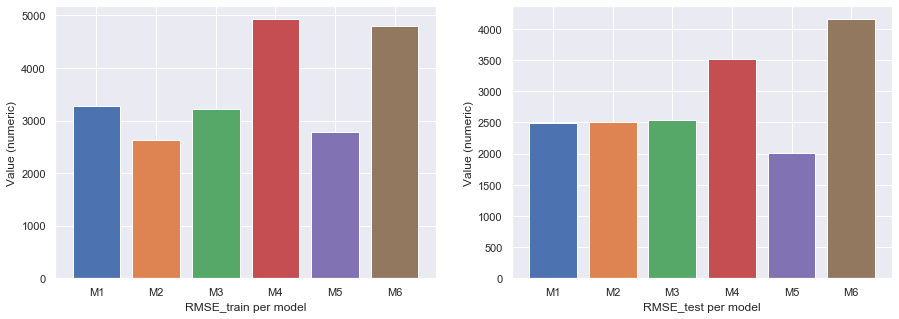

In [158]:
RMSE_train = [M1_rmse_train, M2_rmse_train, M3_rmse_train, M4_rmse_train, M5_rmse_train, M6_rmse_train]
RMSE_test = [M1_rmse_test, M2_rmse_test, M3_rmse_test, M4_rmse_test, M5_rmse_test, M6_rmse_test]

fig, (ax1, ax2)= plt.subplots(1, 2, figsize= (15,5))

for i in range(0,6):
    s = 'M' + str(i+1)
    ax1.bar(s, RMSE_train[i])
    ax1.set_xlabel('RMSE_train per model')
    ax1.set_ylabel('Value (numeric)')

for i in range(0,6):
    s = 'M' + str(i+1)
    ax2.bar(s, RMSE_test[i])
    ax2.set_xlabel('RMSE_test per model')
    ax2.set_ylabel('Value (numeric)')
